In [1]:
import zipfile
import os
import shutil

# Đường dẫn file zip
zip_path = "iris.zip"

# Thư mục tạm để giải nén
temp_extract = "iris_temp_extract"

# Thư mục đích
target_dir = "mong mat"

# Bước 1: Giải nén file zip vào thư mục tạm
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_extract)
print("✅ Đã giải nén xong vào thư mục tạm.")

# Bước 2: Tạo thư mục 'mong mat' nếu chưa có
os.makedirs(target_dir, exist_ok=True)

# Bước 3: Di chuyển toàn bộ file/folder từ thư mục tạm sang 'mong mat'
for item in os.listdir(temp_extract):
    s = os.path.join(temp_extract, item)
    d = os.path.join(target_dir, item)
    if os.path.isdir(s):
        # Nếu là thư mục con thì copy toàn bộ
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

# Xóa thư mục tạm
shutil.rmtree(temp_extract)

print(f"✅ Toàn bộ dữ liệu đã được chuyển vào thư mục: '{target_dir}'")

# In ra danh sách file trong 'mong mat'
print("\n📂 Danh sách file trong thư mục 'mong mat':")
for root, dirs, files in os.walk(target_dir):
    for f in files:
        print(os.path.join(root, f))


✅ Đã giải nén xong vào thư mục tạm.
✅ Toàn bộ dữ liệu đã được chuyển vào thư mục: 'mong mat'

📂 Danh sách file trong thư mục 'mong mat':
mong mat\Duong Ngo Nhat Minh (1).bmp
mong mat\Duong Ngo Nhat Minh (2).bmp
mong mat\Duong Ngo Nhat Minh (3).bmp
mong mat\Duong Ngo Nhat Minh (4).bmp
mong mat\Duong Ngo Nhat Minh (5).bmp
mong mat\Duong Ngo Nhat Minh (6).bmp
mong mat\Duong Ngo Nhat Minh (7).bmp
mong mat\Duong Ngo Nhat Minh (8).bmp
mong mat\Nguyen Quoc Dai (1).bmp
mong mat\Nguyen Quoc Dai (2).bmp
mong mat\Nguyen Quoc Dai (3).bmp
mong mat\Nguyen Quoc Dai (4).bmp
mong mat\Nguyen Quoc Dai (5).bmp
mong mat\Nguyen Quoc Dai (6).bmp
mong mat\Nguyen Quoc Dai (7).bmp
mong mat\Nguyen Quoc Dai (8).bmp
mong mat\Nguyen Viet Gia Bao (1).bmp
mong mat\Nguyen Viet Gia Bao (2).bmp
mong mat\Nguyen Viet Gia Bao (3).bmp
mong mat\Nguyen Viet Gia Bao (4).bmp
mong mat\Nguyen Viet Gia Bao (5).bmp
mong mat\Nguyen Viet Gia Bao (6).bmp
mong mat\Nguyen Viet Gia Bao (7).bmp
mong mat\Nguyen Viet Gia Bao (8).bmp
mong ma

In [2]:
!pip install opencv-python opencv-contrib-python matplotlib

📸 Ảnh truy vấn: Br.bmp
   → Số điểm đặc trưng (keypoints): 46

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (1).bmp
   → Keypoints trong ảnh dataset: 41
   → Số điểm trùng (good matches): 6

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (2).bmp
   → Keypoints trong ảnh dataset: 60
   → Số điểm trùng (good matches): 6

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (3).bmp
   → Keypoints trong ảnh dataset: 86
   → Số điểm trùng (good matches): 5

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (4).bmp
   → Keypoints trong ảnh dataset: 53
   → Số điểm trùng (good matches): 4

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (5).bmp
   → Keypoints trong ảnh dataset: 110
   → Số điểm trùng (good matches): 5

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (6).bmp
   → Keypoints trong ảnh dataset: 87
   → Số điểm trùng (good matches): 3

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (7).bmp
   → Keypoints trong ảnh dataset: 128
   → Số điểm trùng (good matches): 3

🖼️ Ảnh so khớp: Duong Ngo Nhat Minh (8).bmp
   → Keypoints trong ảnh dataset: 74
   → Số điểm trùng (g

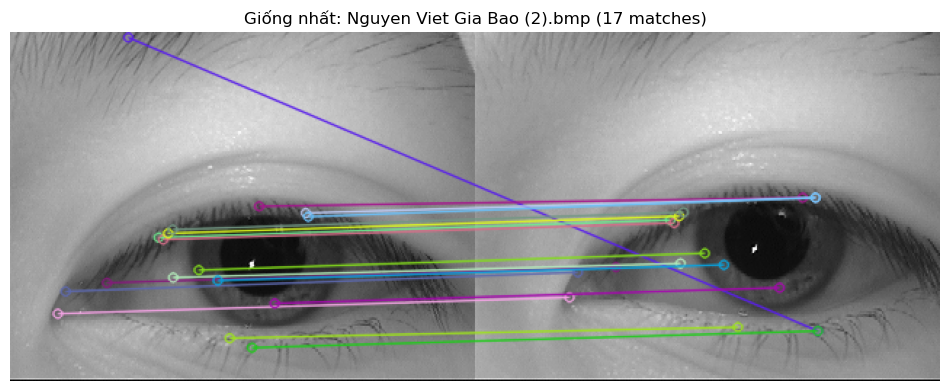

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# ==== CÀI ĐẶT ====
dataset_dir = "mong mat"        # thư mục chứa dataset
query_image_path = "Br.bmp"  # ảnh truy vấn (.bmp)
match_threshold = 10            # ngưỡng điểm ảnh trùng tối thiểu để coi là "giống"

# ==== ĐỌC ẢNH TRUY VẤN ====
query_img = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)
if query_img is None:
    raise FileNotFoundError(f"⚠️ Không tìm thấy ảnh '{query_image_path}'. Hãy đặt ảnh .bmp cạnh notebook.")

# ==== KHỞI TẠO SIFT ====
sift = cv2.SIFT_create()

# ==== TRÍCH XUẤT ĐẶC TRƯNG ẢNH TRUY VẤN ====
kp1, des1 = sift.detectAndCompute(query_img, None)
print(f"📸 Ảnh truy vấn: {query_image_path}")
print(f"   → Số điểm đặc trưng (keypoints): {len(kp1)}\n")

# ==== KHỞI TẠO BFMatcher ====
bf = cv2.BFMatcher()

best_match_name = None
best_match_count = 0
best_good_matches = []
best_img = None
best_kp2 = None

# ==== DUYỆT CÁC ẢNH .bmp TRONG DATASET ====
for filename in os.listdir(dataset_dir):
    if not filename.lower().endswith(".bmp"):
        continue

    path = os.path.join(dataset_dir, filename)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Trích đặc trưng
    kp2, des2 = sift.detectAndCompute(img, None)
    if des2 is None:
        print(f"⚠️ Ảnh {filename} không có đặc trưng SIFT, bỏ qua.")
        continue

    # So khớp
    matches = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in matches if m.distance < 0.75 * n.distance]

    # In thông tin từng ảnh
    print(f"🖼️ Ảnh so khớp: {filename}")
    print(f"   → Keypoints trong ảnh dataset: {len(kp2)}")
    print(f"   → Số điểm trùng (good matches): {len(good)}\n")

    # Cập nhật nếu tốt nhất
    if len(good) > best_match_count:
        best_match_count = len(good)
        best_match_name = filename
        best_good_matches = good
        best_img = img
        best_kp2 = kp2

# ==== KẾT QUẢ ====
if best_match_name:
    print("🔍 Tổng kết:")
    print(f"   → Ảnh giống nhất: {best_match_name}")
    print(f"   → Số điểm trùng cao nhất: {best_match_count}")

    if best_match_count >= match_threshold:
        print(f"✅ Hai ảnh được coi là **GIỐNG NHAU** (≥ {match_threshold} điểm trùng)")

        # Hiển thị kết quả
        result = cv2.drawMatches(
            query_img, kp1,
            best_img, best_kp2,
            best_good_matches, None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
        )
        plt.figure(figsize=(12, 6))
        plt.imshow(result[..., ::-1])
        plt.title(f"Giống nhất: {best_match_name} ({best_match_count} matches)")
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ Hai ảnh được coi là **KHÁC NHAU** (< {match_threshold} điểm trùng)")
else:
    print("❌ Không tìm thấy ảnh nào trùng đặc trưng đủ tốt.")


Đang tải ảnh truy vấn: Dr.bmp...
✅ Đã xử lý ảnh truy vấn.

Đang quét thư mục dataset: mong mat...

🖼️  Ảnh: Duong Ngo Nhat Minh (1).bmp
   ➤ Khoảng cách Hamming: 0.3404
   ➤ Tỉ lệ khớp: 65.96%

🖼️  Ảnh: Duong Ngo Nhat Minh (2).bmp
   ➤ Khoảng cách Hamming: 0.5122
   ➤ Tỉ lệ khớp: 48.78%

🖼️  Ảnh: Duong Ngo Nhat Minh (3).bmp
   ➤ Khoảng cách Hamming: 0.4224
   ➤ Tỉ lệ khớp: 57.76%

🖼️  Ảnh: Duong Ngo Nhat Minh (4).bmp
   ➤ Khoảng cách Hamming: 0.3610
   ➤ Tỉ lệ khớp: 63.90%

🖼️  Ảnh: Duong Ngo Nhat Minh (5).bmp
   ➤ Khoảng cách Hamming: 0.4019
   ➤ Tỉ lệ khớp: 59.81%

🖼️  Ảnh: Duong Ngo Nhat Minh (6).bmp
   ➤ Khoảng cách Hamming: 0.4028
   ➤ Tỉ lệ khớp: 59.72%

🖼️  Ảnh: Duong Ngo Nhat Minh (7).bmp
   ➤ Khoảng cách Hamming: 0.4444
   ➤ Tỉ lệ khớp: 55.56%

🖼️  Ảnh: Duong Ngo Nhat Minh (8).bmp
   ➤ Khoảng cách Hamming: 0.3771
   ➤ Tỉ lệ khớp: 62.29%

🖼️  Ảnh: Nguyen Quoc Dai (1).bmp
   ➤ Khoảng cách Hamming: 0.2303
   ➤ Tỉ lệ khớp: 76.97%

🖼️  Ảnh: Nguyen Quoc Dai (2).bmp
   ➤ Khoảng cách 

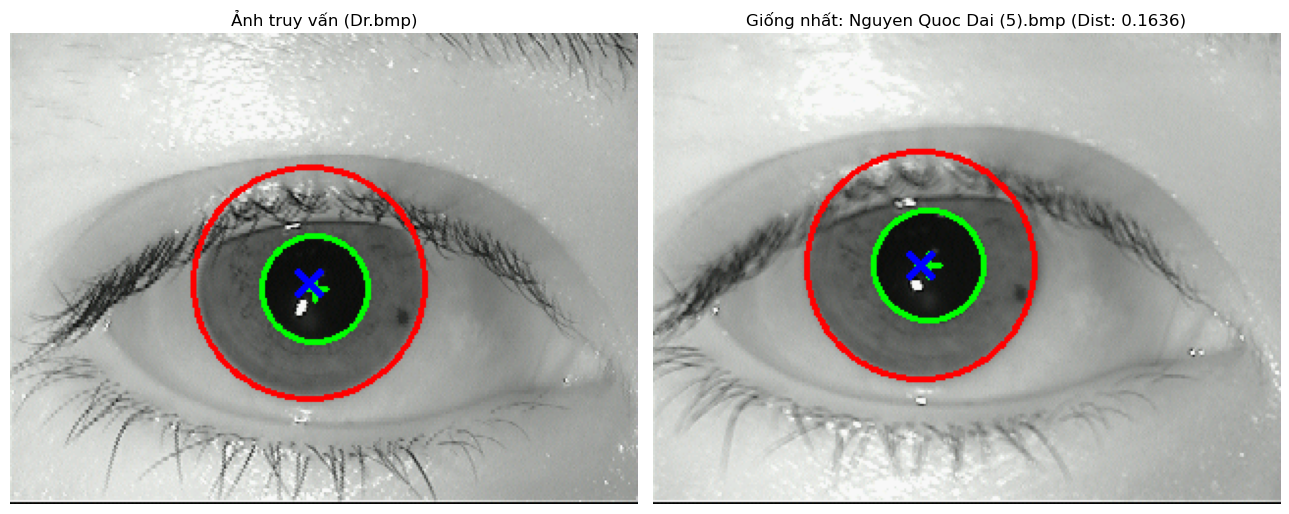

In [5]:
import cv2
import numpy as np
import os
from scipy import ndimage
import matplotlib.pyplot as plt

# === ĐƯỜNG DẪN ===
dataset_dir = "mong mat"
query_image_path = "Dr.bmp"

# === CÁC THAM SỐ CÓ THỂ TINH CHỈNH ===

# --- Tham số xóa đốm sáng ---
REFLECTION_THRESH = 230
# --- Tham số tìm Pupil (Threshold + Contour) ---

# SỬA LỖI: Tăng ngưỡng pupil để bắt được tròng đen "xám"
PUPIL_THRESH = 85 # Tăng từ 60 -> 85
PUPIL_MIN_AREA = 800 # Diện tích contour tối thiểu
PUPIL_MAX_AREA = 18000 # Diện tích contour tối đa

# --- Tham số tìm Iris (Multi-Canny Scan) ---
# Một danh sách các cặp ngưỡng Canny để thử. Sẽ chọn kết quả tốt nhất.
CANNY_THRESHOLDS = [
    (30, 80),  # Mặc định
    (20, 60),  # Dành cho ảnh mờ hơn
    (40, 100), # Dành cho ảnh rõ nét hơn
    (50, 120), # Dành cho ảnh rất rõ
]
IRIS_RADIUS_MIN_OFFSET = 20  # Bán kính iris nhỏ nhất so với pupil

# SỬA LỖI: Mở rộng dải quét mống mắt
IRIS_RADIUS_MAX_OFFSET = 110 # Tăng từ 80 -> 110

IRIS_RADIUS_STEP = 1         # Bước nhảy khi quét
IRIS_SCAN_POINTS = 360       # Số điểm quét trên mỗi vòng tròn (tăng để chính xác hơn)
IRIS_CONTOUR_VOTE_RANGE = 3  # Phạm vi pixel xung quanh đường quét để tính vote

# --- Tham số Gabor & So khớp ---
NORM_RADIALS = 64
NORM_ANGLES = 512
HAMMING_MATCH_THRESHOLD = 0.45 # Ngưỡng Hamming (có thể nới lỏng nhẹ nếu cần)

# === HẾT THAM SỐ ===


# === HÀM XỬ LÝ CHÍNH ===

def remove_specular_reflections(img_gray):
    """
    Xóa đốm sáng bằng inpainting và làm mờ cục bộ.
    """
    img_blur = cv2.medianBlur(img_gray, 5)
    _, mask = cv2.threshold(img_blur, REFLECTION_THRESH, 255, cv2.THRESH_BINARY)
    mask = cv2.dilate(mask, np.ones((5, 5), np.uint8), iterations=2)
    img_inpainted = cv2.inpaint(img_gray, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)
    img_final = cv2.bilateralFilter(img_inpainted, 9, 75, 75)
    return img_final


def detect_iris_boundaries(img):
    """
    Robust detection:
    - Try HoughCircles for pupil; fallback to contour.
    - Try HoughCircles for iris; fallback to multi-canny voting with small allowed center shift.
    Returns:
      pupil_out = (x_pupil, y_pupil, r_pupil)
      iris_out  = (x_iris,  y_iris,  r_iris)
    """
    if len(img.shape) > 2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()
    h, w = img_gray.shape

    # Pre-clean reflections for robustness
    img_clean = remove_specular_reflections(img_gray)

    # --- Try HoughCircles for pupil (preferred) ---
    pupil_found = False
    cx = w // 2; cy = h // 2; r_pupil = 40.0

    img_blur = cv2.GaussianBlur(img_clean, (7, 7), 2)

    minR = max(6, int(min(h, w) * 0.02))
    maxR = max(20, int(min(h, w) * 0.18))
    try:
        circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, dp=1.5, minDist=20,
                                   param1=80, param2=28, minRadius=minR, maxRadius=maxR)
    except Exception:
        circles = None

    if circles is not None and len(circles[0]) > 0:
        # select the darkest circle (low mean intensity inside)
        best = None; best_mean = 1e9
        for c in circles[0]:
            x, y, r = c
            xi, yi, ri = int(round(x)), int(round(y)), max(1, int(round(r)))
            mask = np.zeros_like(img_gray, dtype=np.uint8)
            cv2.circle(mask, (xi, yi), max(2, ri//2), 255, -1)
            mean = cv2.mean(img_gray, mask=mask)[0]
            if mean < best_mean:
                best_mean = mean; best = (x, y, r)
        if best is not None:
            cx, cy, r_pupil = float(best[0]), float(best[1]), float(best[2])
            pupil_found = True

    # --- Fallback: contour-based pupil detection ---
    if not pupil_found:
        img_pupil_blur = cv2.medianBlur(img_clean, 5)
        _, thresh = cv2.threshold(img_pupil_blur, PUPIL_THRESH, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        best_contour = None; max_area = 0
        for c in contours:
            area = cv2.contourArea(c)
            if PUPIL_MIN_AREA < area < PUPIL_MAX_AREA and area > max_area:
                max_area = area; best_contour = c
        if best_contour is not None:
            (x, y), r = cv2.minEnclosingCircle(best_contour)
            cx, cy, r_pupil = float(x), float(y), float(r)
        else:
            # final fallback center
            cx, cy, r_pupil = float(w//2), float(h//2), 40.0
            print(f"⚠️ Fallback pupil for {query_image_path}: center {(cx,cy)}, r {r_pupil}")

    # --- Iris search: try HoughCircles first ---
    r_min = int(r_pupil + IRIS_RADIUS_MIN_OFFSET)
    r_max = int(min(min(w, h) // 2 - 5, r_pupil + IRIS_RADIUS_MAX_OFFSET))
    if r_min >= r_max:
        r_min = int(r_pupil + 20)
        r_max = int(r_pupil + 80)
    iris_found = False
    iris_r = r_min + 40
    try:
        img_iris_blur = cv2.GaussianBlur(img_clean, (9,9), 3)
        circles_iris = cv2.HoughCircles(img_iris_blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                                        param1=80, param2=30, minRadius=max(10, r_min),
                                        maxRadius=min(int(r_max), int(min(w,h)//2 - 5)))
    except Exception:
        circles_iris = None

    if circles_iris is not None and len(circles_iris[0]) > 0:
        # pick the circle closest to pupil center
        best_irc = None; best_d = 1e9
        for cc in circles_iris[0]:
            ix, iy, ir = cc
            d = np.hypot(ix - cx, iy - cy)
            if d < best_d:
                best_d = d; best_irc = (ix, iy, ir)
        if best_irc is not None:
            iris_r = float(best_irc[2])
            # allow separate center for iris if Hough suggests it (use its center)
            iris_cx = float(best_irc[0]); iris_cy = float(best_irc[1])
            iris_found = True
        else:
            iris_cx, iris_cy = cx, cy
    else:
        iris_cx, iris_cy = cx, cy

    # --- If iris Hough failed, perform multi-canny voting (with small center shift) ---
    if not iris_found:
        edges_comb = np.zeros_like(img_gray)
        for low, high in CANNY_THRESHOLDS:
            e = cv2.Canny(cv2.GaussianBlur(img_clean, (5,5), 1), low, high)
            edges_comb = cv2.bitwise_or(edges_comb, e)

        best_votes = -1
        best_r = max(r_min, int(r_pupil + IRIS_RADIUS_MIN_OFFSET))
        best_center = (cx, cy)

        # precompute angles
        angles = np.linspace(0, 2*np.pi, max(180, IRIS_SCAN_POINTS), endpoint=False)
        cos_t = np.cos(angles); sin_t = np.sin(angles)

        # allow small center shift window (reduces chance of always using pupil center)
        center_window = range(-6, 7, 2)  # -6,-4,-2,0,2,4,6

        for r in range(r_min, r_max, max(1, IRIS_RADIUS_STEP)):
            # sample points for each candidate center
            for dx in center_window:
                for dy in center_window:
                    cx_cand = cx + dx
                    cy_cand = cy + dy
                    xs = np.clip((cx_cand + r * cos_t).astype(np.int32), 0, w-1)
                    ys = np.clip((cy_cand + r * sin_t).astype(np.int32), 0, h-1)
                    votes = np.sum(edges_comb[ys, xs] > 0)
                    if votes > best_votes:
                        best_votes = votes
                        best_r = r
                        best_center = (cx_cand, cy_cand)

        iris_r = float(best_r)
        iris_cx, iris_cy = float(best_center[0]), float(best_center[1])

    # Post checks
    if iris_r <= r_pupil + 10:
        iris_r = float(r_pupil + 40.0)
    if iris_r > min(w,h)//2:
        iris_r = float(min(w,h)//2 - 5)

    pupil_out = (int(round(cx)), int(round(cy)), int(round(r_pupil)))
    iris_out = (int(round(iris_cx)), int(round(iris_cy)), int(round(iris_r)))
    return pupil_out, iris_out


def normalize_iris(img, pupil, iris, radials=NORM_RADIALS, angles=NORM_ANGLES):
    """
    Fast normalization using cv2.remap (rubber-sheet model).
    Returns polar image shape: (radials, angles)
    """
    if len(img.shape) > 2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    x_pupil, y_pupil, r_pupil = pupil
    x_iris, y_iris, r_iris = iris

    # Ensure iris radius > pupil radius
    if r_iris <= r_pupil + 2:
        r_iris = r_pupil + max(5, int(r_pupil * 0.6))

    # Create theta and normalized radii
    theta = np.linspace(0, 2*np.pi, angles, endpoint=False)
    r_norm = np.linspace(0, 1, radials)

    # Precompute cos/sin
    cos_t = np.cos(theta)[None, :]  # shape (1, angles)
    sin_t = np.sin(theta)[None, :]

    # radius_map (radials, 1)
    radius_map = (r_pupil + r_norm[:, None] * (r_iris - r_pupil))  # (radials,1)

    # Compute X,Y coordinate maps (radials, angles)
    # Map relative to pupil center (Daugman style). If you prefer iris center, swap x_pupil,y_pupil -> x_iris,y_iris.
    X = x_pupil + radius_map * cos_t
    Y = y_pupil + radius_map * sin_t

    # Clip and convert to float32 for remap
    X = np.clip(X, 0, img_gray.shape[1] - 1).astype(np.float32)
    Y = np.clip(Y, 0, img_gray.shape[0] - 1).astype(np.float32)

    # cv2.remap expects map_x (cols) and map_y (rows)
    polar = cv2.remap(img_gray, X, Y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    # polar shape: (radials, angles)
    return polar


def gabor_encode(polar):
    polar_float = polar.astype(np.float32)
    kernel = cv2.getGaborKernel((21, 21), 4.0, np.pi / 4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    filtered = cv2.filter2D(polar_float, cv2.CV_32F, kernel)
    code = (filtered > np.mean(filtered)).astype(np.uint8)
    return code

def hamming_distance(code1, code2):
    if code1.shape != code2.shape:
        print(f"Lỗi: Kích thước mã Gabor không khớp! {code1.shape} vs {code2.shape}")
        return 1.0, 0
    total_bits = code1.size
    diff = np.sum(code1 != code2)
    return diff / total_bits, total_bits - diff

def draw_boundaries(img_in, pupil, iris):
    """
    Vẽ pupil (xanh lá), iris (đỏ) với tâm tương ứng.
    Nếu pupil center khác iris center sẽ hiển thị rõ sự khác biệt.
    """
    draw = img_in.copy()
    # convert centers to ints
    px, py, pr = int(pupil[0]), int(pupil[1]), int(pupil[2])
    ix, iy, ir = int(iris[0]), int(iris[1]), int(iris[2])

    cv2.circle(draw, (px, py), pr, (0, 255, 0), 2)   # pupil green
    cv2.circle(draw, (ix, iy), ir, (0, 0, 255), 2)   # iris red
    # draw different markers for centers
    cv2.drawMarker(draw, (px, py), (0, 255, 0), cv2.MARKER_CROSS, 12, 2)
    cv2.drawMarker(draw, (ix, iy), (255, 0, 0), cv2.MARKER_TILTED_CROSS, 12, 2)
    return draw[..., ::-1]  # BGR -> RGB for matplotlib


# === HÀM CHẠY CHÍNH (MAIN EXECUTION) ===
def main():
    print(f"Đang tải ảnh truy vấn: {query_image_path}...")
    query_img = cv2.imread(query_image_path)
    if query_img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh truy vấn: {query_image_path}")

    try:
        pupil_q, iris_q = detect_iris_boundaries(query_img)
        normalized_query = normalize_iris(query_img, pupil_q, iris_q)
        code_query = gabor_encode(normalized_query)
        print("✅ Đã xử lý ảnh truy vấn.")
    except Exception as e:
        print(f"❌ Lỗi khi xử lý ảnh truy vấn ({query_image_path}): {e}")
        return

    print(f"\nĐang quét thư mục dataset: {dataset_dir}...")
    best_file = None
    best_img = None
    best_dist = 1.0

    for file in os.listdir(dataset_dir):
        if file.lower().endswith((".bmp", ".jpg", ".png")):
            path = os.path.join(dataset_dir, file)
            if os.path.basename(path) == os.path.basename(query_image_path):
                continue
            img = cv2.imread(path)
            if img is None:
                print(f"⚠️ Bỏ qua: Không thể đọc file {file}")
                continue
            try:
                pupil, iris = detect_iris_boundaries(img)
                normalized = normalize_iris(img, pupil, iris)
                code_dataset = gabor_encode(normalized)

                dist, same_pixels = hamming_distance(code_query, code_dataset)
                total_pixels = code_query.size
                same_ratio = (same_pixels / total_pixels) if total_pixels > 0 else 0

                print(f"\n🖼️  Ảnh: {file}")
                print(f"   ➤ Khoảng cách Hamming: {dist:.4f}")
                print(f"   ➤ Tỉ lệ khớp: {same_ratio * 100:.2f}%")

                if dist < best_dist:
                    best_dist = dist
                    best_file = file
                    best_img = img

            except Exception as e:
                print(f"⚠️ Lỗi khi xử lý file {file}: {e}. Bỏ qua...")

    print("\n" + "="*30)
    print("===== 🔍 KẾT QUẢ NHẬN DẠNG =====")
    print("="*30)

    if best_img is None:
        print("❌ Không tìm thấy ảnh nào trong dataset để so sánh.")
    elif best_dist > HAMMING_MATCH_THRESHOLD:
        print(f"❌ KHÔNG TÌM THẤY ẢNH KHỚP.")
        print(f"   (Ảnh gần nhất là '{best_file}' với khoảng cách {best_dist:.4f})")
    else:
        print(f"✅ ẢNH GIỐNG NHẤT: {best_file}")
        print(f"   ➤ Khoảng cách Hamming: {best_dist:.4f}")

        img_q_draw = draw_boundaries(query_img, pupil_q, iris_q)

        pupil_b, iris_b = detect_iris_boundaries(best_img)
        img_b_draw = draw_boundaries(best_img, pupil_b, iris_b)

        plt.figure(figsize=(13, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(img_q_draw)
        plt.title(f"Ảnh truy vấn ({os.path.basename(query_image_path)})")
        plt.xlabel(f"Pupil: {pupil_q}\nIris: {iris_q}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(img_b_draw)
        plt.title(f"Giống nhất: {best_file} (Dist: {best_dist:.4f})")
        plt.xlabel(f"Pupil: {pupil_b}\nIris: {iris_b}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

# Chạy chương trình
if __name__ == "__main__":
    main()
